# 1. Working with Unlabeled Data – Clustering Analysis
## Basic imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../..')
from imports.methods import plot_decision_regions

# 2. Grouping objects by similarity using k-means
## 1. Create a dataset that can be roughly grouped into regions

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

## 2. Visualize the dataset
- The three regions can be visualy identified

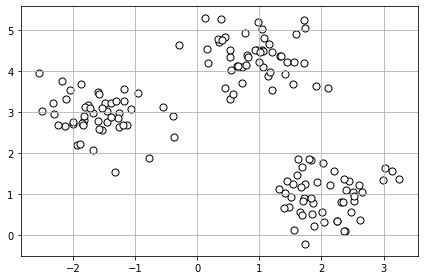

In [4]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

## 3. Apply the k-means algorithm
- The scikit-learn implementation accounts for the cases where one or more of the resulting clusters are empty, which the algorithm itself does not
- The default setting for init is 'k-means++', which is generally a more efficient strategy for putting initial centroids

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

## 4. Visualize the resulting clusters and centroids

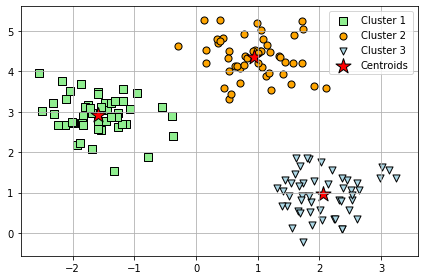

In [7]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

## 5. Using the elbow method to find the optimal number of clusters
### 1. Accessing the within-cluster SSE via the inertia_ attribute of the model

In [8]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


### 2. Elbow method: plot the distortion for different values of k
- The idea is to identify the value of k where the distortion begins to increase most rapidly
- As we can see, the elbow is located at k = 3, so this is evidence that k = 3 is indeed a good choice for this dataset

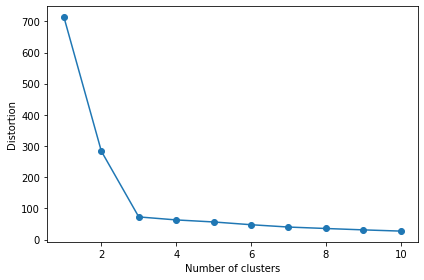

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## 6. Quantifying the quality of clustering  via silhouette plots